# Listas de Processamento Estatístico de Sinais



###Aluno Lucas de Souza Abdalah
###Matrícula 385472
###Professor Charles Casimiro

- - - 

# Lista 1

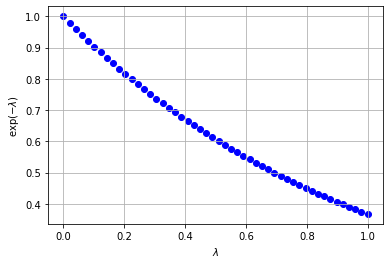

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

N_lamb = 50;
par_lambda = np.linspace(0, 1, N_lamb);
exp_lambda = np.zeros([N_lamb,1]);

for ii in range(N_lamb):
  exp_lambda[ii,0] = np.exp(-par_lambda[ii]);

plt.scatter(par_lambda, exp_lambda,c='b');
plt.xlabel('$\lambda$') 
plt.ylabel('$\exp(-\lambda)$')  
plt.grid('on');
plt.show();

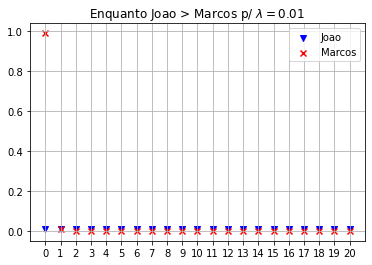


[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [ ]:
## Exponential and Poisson Distribution
N = 21; # Samples Setup
x = np.arange(N); y = np.arange(N);
Px, Py = np.zeros([N,1]), np.zeros([N,1]);

# Parameter lambda
lamb = 1e-2; # By definition lambda is a constant greater than zero: lamb > 0

# Distributions
Px = lamb*(np.exp(-lamb*x));
for ii in range(N):
  Py[ii] = np.exp(-lamb)*(lamb**y[ii]/factorial(y[ii]));

  Py = Py.squeeze(); # Squeezing the array
# Plot
plt.scatter(x,Px,marker='v',c='b'); plt.scatter(y,Py,marker='x', c='r');
plt.legend(['Joao', 'Marcos']); 
plt.xticks(y); 
plt.grid('on'); 
plt.title('Enquanto Joao > Marcos p/ $\lambda=$' + str(lamb));
plt.show();
print('\n' + str(Px > Py))

# Lista 4

## Questao 1

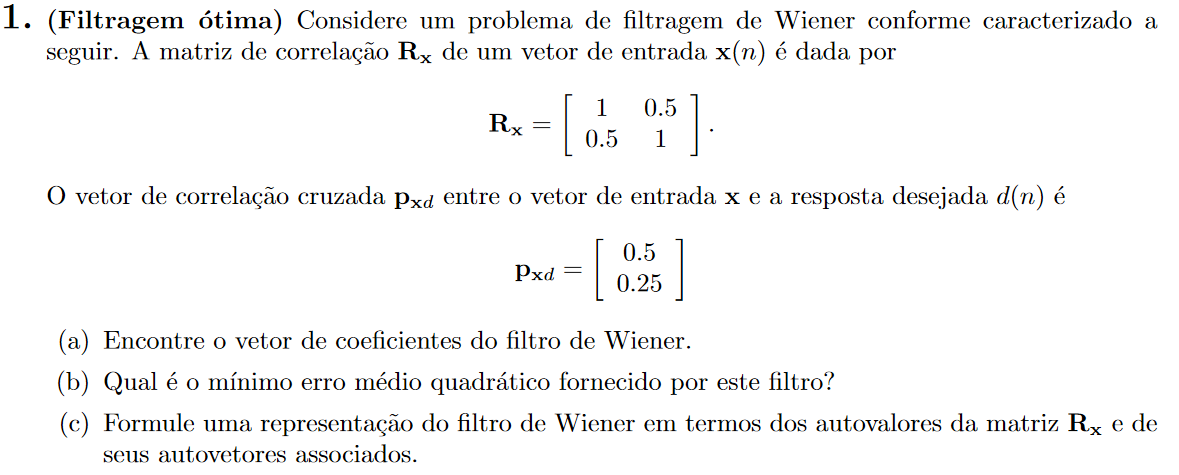

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Questao 1
Rx = np.array([ [1,0.5],[0.5,1] ])
Pxd = np.array([ [0.5],[0.25] ])
# Computando a Inversa 
invRx = np.linalg.inv(Rx);
# (Matriz de correlação)
print('Rx = \n'+str(Rx))
# (Matriz de correlação)^-1
print('\nRx^-1 =\n'+str(invRx))
w = np.dot(invRx,Pxd);
# Coeficientes
print('\nW = \n' + str(w))

Rx = 
[[1.  0.5]
 [0.5 1. ]]

Rx^-1 =
[[ 1.33333333 -0.66666667]
 [-0.66666667  1.33333333]]

W = 
[[0.5]
 [0. ]]

Erro = 
[[0.0625]]


## Questao 5

AttributeError: ignored

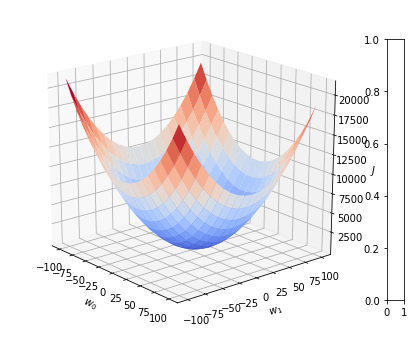

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

N = 20;
w_lim = 100;

w_0,w_1 = np.linspace(-w_lim,w_lim,N),np.linspace(-w_lim,w_lim,N);
w_0, w_1 = np.meshgrid(w_0, w_1);

def J_surface(w_0,w_1):
  return 24.40 - 4*w_0 - 9*w_1 + w_0**2 + w_1**2;

J = J_surface(w_0,w_1);

fig = plt.figure(figsize=(8,6))

# 3d Surface Plot
ax = plt.axes(projection='3d')
ax.plot_surface(w_0, w_1, J,cmap='coolwarm', edgecolor='none')
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel(r'$J$')
ax.view_init(20, -40)
cb=fig.colorbar(mappable = ,shrink=0.8,aspect=15,label='$J(w_0,w_1)$')#Add color bars, shrink means zo
plt.show()

# fig.savefig("surface_plot.pdf", bbox_inches='tight')

# Lista 6

In [3]:
import numpy as np
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [16]:
# Correlation Coeficient
def correlation_coefficient(vector1, vector2):
    product = np.mean((vector1 - vector1.mean()) * (vector2 - vector2.mean()))
    stds = vector1.std() * vector2.std()

    if stds == 0:
        return 0
    else:
        product = product / stds

        return product

# Auto-Correlation Matrix
def autocorrmatrix(matrix):
    if np.isreal(matrix).all():
        autocorr_matrix = np.zeros([matrix.shape[1], matrix.shape[1]])
    else:
        autocorr_matrix = np.zeros([matrix.shape[1], matrix.shape[1]], dtype='complex')

    for i in range(0, matrix.shape[1]):
        for j in range(0, matrix.shape[1]):
            autocorr_matrix[i, j] = correlation_coefficient(matrix[:, i], matrix[:, j])

    return autocorr_matrix

# Cross-Correlation Matrix
def corrmatrix(matrix1, matrix2):
    if np.isreal(matrix1).all() and np.isreal(matrix2).all():
        corr_matrix = np.zeros([matrix1.shape[1], matrix1.shape[1]])
    else:
        corr_matrix = np.zeros([matrix1.shape[1], matrix1.shape[1]], dtype='complex')

    for i in range(0, matrix1.shape[1]):
        for j in range(0, matrix1.shape[1]):
            corr_matrix[i, j] = correlation_coefficient(matrix1[:, i], matrix2[:, j])

    return corr_matrix

In [17]:
def wiener(signal_tx, signal):
    Rxx = (signal_tx @ signal_tx.T)/signal.shape[0]
    Rxs = (signal_tx @ signal.T)/signal.shape[0]

    filter_coef_wiener = (np.linalg.inv(Rxx) @ Rxs)
    
    signal_approx = filter_coef_wiener.T @ signal
    MSE = (np.linalg.norm(signal_tx-signal_approx))**2 / (np.linalg.norm(signal_tx))**2
    
    return filter_coef_wiener, signal_approx, MSE

In [ ]:
n,m = 500,2
SNR = np.array([0,5,10,15,20,25,30])

run = 50
MSE = np.zeros([len(SNR)])
for i in range(run):
    signal = np.random.randn(n,m)
    for j in range(len(SNR)):
        snr_dB = SNR[j]
        snr_li = 10**(snr_dB/10)
        var_signal = np.var(signal)
        var_noise = var_signal/snr_li
        noise = (np.sqrt(var_noise)/np.sqrt(2)) * np.random.randn(n,m) 
        signal_tx = signal + noise
        [filter_coef_wiener, signal_approx, mse] = wiener(signal_tx, signal)
    
        MSE[j] = MSE[j] + mse

MSE = MSE/run

w0 = np.zeros(n)
w1 = np.zeros(n)
for i in range(n):
    w0[i] = filter_coef_wiener[i][0]
    w1[i] = filter_coef_wiener[i][1]

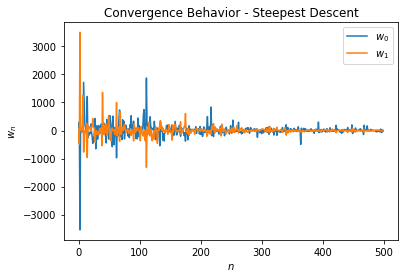

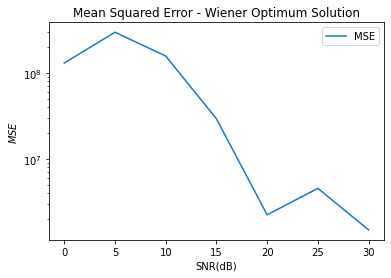

In [20]:

plt.figure()
plt.plot(w0, label="$w_0$")
plt.plot(w1, label="$w_1$")
plt.title('Convergence Behavior - Steepest Descent')
plt.ylabel("$w_{n}$")
plt.xlabel("$n$")
plt.legend()
plt.show()

plt.figure()
plt.semilogy(SNR, MSE, label="MSE")
plt.title('Mean Squared Error - Wiener Optimum Solution')
plt.ylabel('$MSE$')
plt.xlabel('SNR(dB)')
plt.legend()
plt.show()

In [ ]:
n,m = 500,1000
SNR = np.array([0,5,10,15,20,25,30])

run = 50
MSE = np.zeros([len(SNR)])
for i in range(run):
    signal = np.random.randn(n,m)
    for j in range(len(SNR)):
        snr_dB = SNR[j]
        snr_li = 10**(snr_dB/10)
        var_signal = np.var(signal)
        var_noise = var_signal/snr_li
        noise = (np.sqrt(var_noise)/np.sqrt(2)) * np.random.randn(n,m) 
        signal_tx = signal + noise
        [filter_coef_wiener, signal_approx, mse] = wiener(signal_tx, signal)
    
        MSE[j] = MSE[j] + mse

MSE = MSE/run

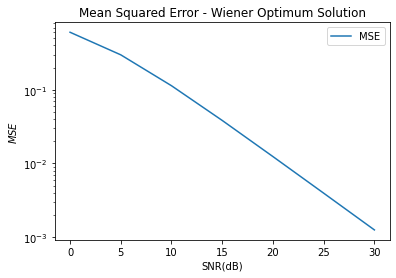

In [25]:
plt.figure()
plt.semilogy(SNR, MSE, label="MSE")
plt.title('Mean Squared Error - Wiener Optimum Solution')
plt.ylabel('$MSE$')
plt.xlabel('SNR(dB)')
plt.legend()
plt.show()

In [26]:
def steepest_descent(filter_order, signal_tx, signal, step, autocorr_matrix, corr_matrix):
    
    filter_error = np.zeros((signal_tx.size))
    filter_coef = np.zeros((signal_tx.size, filter_order, 1))
    waux = np.zeros((filter_order, 1))
    for i in range(signal_tx.size):
        filter_error[i] = (np.var(signal) - 2*waux.T@corr_matrix + waux.T@autocorr_matrix@waux)[0,0]
        waux = waux -  2 * step * (autocorr_matrix @ waux - corr_matrix[0,1])
        filter_coef[i] = waux
    
    return filter_coef, filter_error

In [27]:
n, step, filter_order = 1000, 0.1, 2

signal = np.random.randn(n,)

snr_dB = 30
snr_li = 10**(snr_dB/10)
var_signal = np.var(signal)
var_noise = var_signal/snr_li
noise = (np.sqrt(var_noise)/np.sqrt(2)) * np.random.randn(n,) 

signal_tx = signal + noise
signal_tx = np.convolve(signal_tx,np.r_[1, 1.6], mode = "same")

corr_matrix = np.corrcoef(signal_tx,signal)
autocorr_matrix = np.corrcoef(signal_tx,signal_tx)

[filter_coef_steepest_descent,filter_error] = steepest_descent(filter_order, signal_tx, signal, step, autocorr_matrix, corr_matrix)

w0 = np.zeros(n)
w1 = np.zeros(n)
for i in range(n):
    w0[i] = filter_coef_steepest_descent[i][0]
    w1[i] = filter_coef_steepest_descent[i][1]


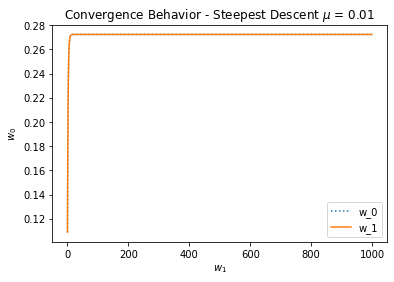

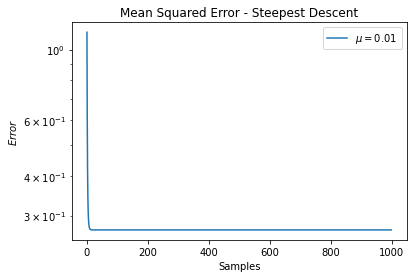

In [33]:
plt.figure()
plt.plot(w0, ':', label="w_0")
plt.plot(w1, label="w_1")
plt.title('Convergence Behavior - Steepest Descent $\mu$ = 0.01')
plt.ylabel("$w_{0}$")
plt.xlabel("$w_{1}$")
plt.legend()
plt.show()

plt.figure()
plt.semilogy(np.abs(filter_error)**2, label="$\mu = 0.01$")
plt.title('Mean Squared Error - Steepest Descent')
plt.ylabel('$Error$')
plt.xlabel('Samples')
plt.legend()
plt.show()

In [34]:
def newton(filter_order, signal_tx, step, autocorr_matrix, corr_matrix):
    
    filter_error = np.zeros((signal_tx.size))
    filter_coef = np.zeros((signal_tx.size, filter_order, 1))
    waux = np.zeros((filter_order, 1))
    for i in range(signal_tx.size):
        filter_error[i] = (waux - np.linalg.inv(autocorr_matrix) @ corr_matrix)[0,0]
        waux = waux - step * (waux - np.linalg.inv(autocorr_matrix) @ corr_matrix)
        filter_coef[i] = waux
        
    return filter_coef,filter_error

In [35]:
n, step, filter_order = 1000, 0.1, 2

signal = np.random.randn(n,)

snr_dB = 30
snr_li = 10**(snr_dB/10)
var_signal = np.var(signal)
var_noise = var_signal/snr_li
noise = (np.sqrt(var_noise)/np.sqrt(2)) * np.random.randn(n,) 

signal_tx = signal + noise
signal_tx = np.convolve(signal_tx,np.r_[1, 1.6], mode = "same")

signal = signal[:,None]
signal_tx = signal_tx[:,None]

corr_matrix = corrmatrix(signal_tx,signal)
autocorr_matrix = autocorrmatrix(signal_tx)

[filter_coef_newton, filter_error] = newton(filter_order, signal, step, autocorr_matrix, corr_matrix)

w0 = np.zeros(n)
w1 = np.zeros(n)
for i in range(n):
    w0[i] = filter_coef_newton[i][0]
    w1[i] = filter_coef_newton[i][1]

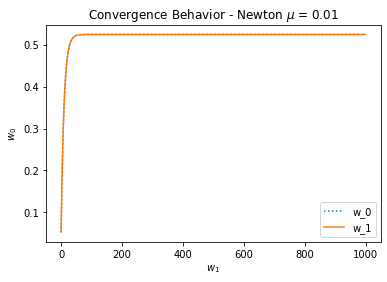

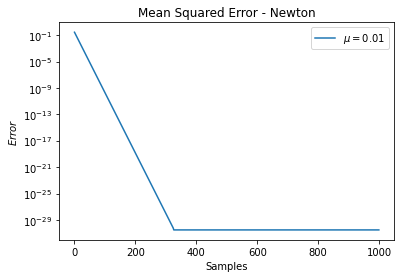

In [37]:
plt.figure()
plt.plot(w0, ':', label="w_0")
plt.plot(w1, label="w_1")
plt.title('Convergence Behavior - Newton $\mu$ = 0.01')
plt.ylabel("$w_{0}$")
plt.xlabel("$w_{1}$")
plt.legend()
plt.show()

plt.figure()
plt.semilogy(np.abs(filter_error)**2, label="$\mu = 0.01$")
plt.title('Mean Squared Error - Newton')
plt.ylabel('$Error$')
plt.xlabel('Samples')
plt.legend()
plt.show()